# Polynomial Regression Hackathon
This notebook walks you through linear and polynomial regression.
At the end, you’ll run a hackathon challenge: find the best polynomial fit for housing data.


## Warm-up: Simple Linear Regression

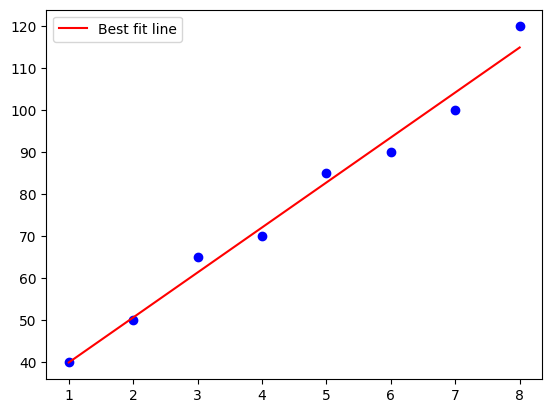

Slope: 10.714285714285715 Intercept: 29.285714285714278


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X: np.ndarray = np.array([1,2,3,4,5,6,7,8]).reshape(-1, 1)
y: np.ndarray = np.array([40, 50, 65, 70, 85, 90, 100, 120])

model = LinearRegression()
model.fit(X, y)
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red', label='Best fit line')
plt.legend(); plt.show()
print(f'Slope: {model.coef_[0]} Intercept: {model.intercept_}')

## Polynomial Regression Example

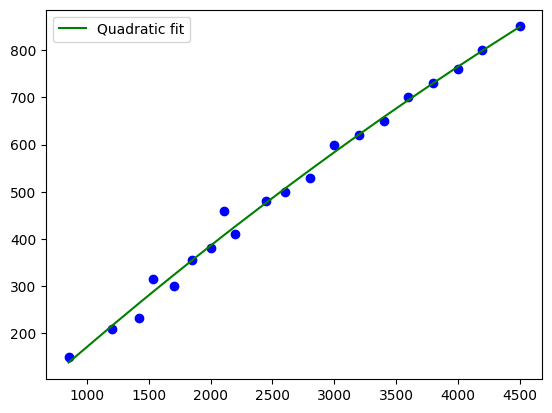

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
plt.scatter(X, y, color='blue')
plt.plot(X, model_poly.predict(X_poly), color='green', label='Quadratic fit')
plt.legend(); plt.show()

## Hackathon Dataset

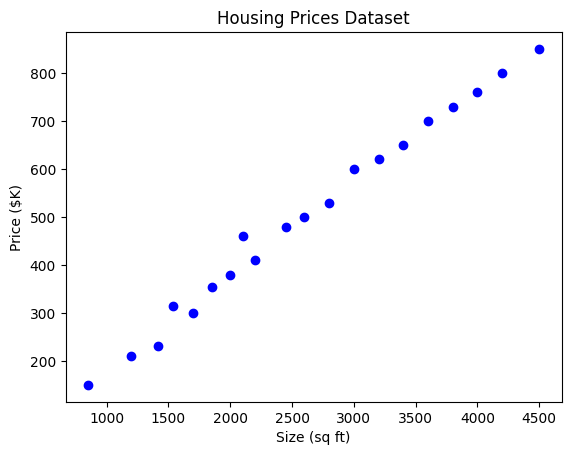

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Larger housing dataset
data = {
    "Size": [850, 1200, 1416, 1534, 1700, 1850, 2000, 2104, 2200, 2450,
             2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4500],
    "Price": [150, 210, 232, 315, 300, 355, 380, 460, 410, 480,
              500, 530, 600, 620, 650, 700, 730, 760, 800, 850]
}
df = pd.DataFrame(data)

X = df[["Size"]]
y = df["Price"]

plt.scatter(X, y, color="blue")
plt.xlabel("Size (sq ft)")
plt.ylabel("Price ($K)")
plt.title("Housing Prices Dataset")
plt.show()

## Step 1. Define polynomial fit function (TODO)

In [19]:
def fit_polynomial(X, y, degree):
    # Create polynomial features, fit LinearRegression, compute predictions and MSE
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    model_poly = LinearRegression()
    fit = model_poly.fit(X_poly, y)
    y_prediction = model_poly.predict(X_poly)

    error = mean_squared_error(
        y, # true ("correct") values
        y_prediction # predicted Y values
    )
    
    return fit, y_prediction, error

## Step 2. Try polynomials 1–4 and compute MSE (TODO)

In [29]:
errors = {}
predictions = {}

for d in range(1, 5):
    # Loop over polynomials 1–4, compute errors, and plot fits
    fit, predictions[d], errors[d] = fit_polynomial(X, y, d)

print('MSE by degree:', errors)

MSE by degree: {1: 379.46501786909926, 2: 308.6571322625057, 3: 308.2236317086377, 4: 300.7664287492938}


## Step 3. Compare models visually (TODO)

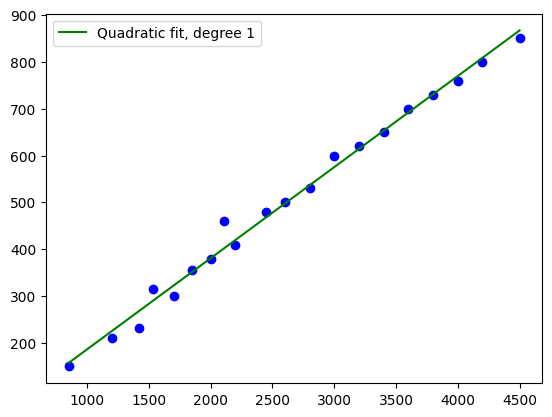

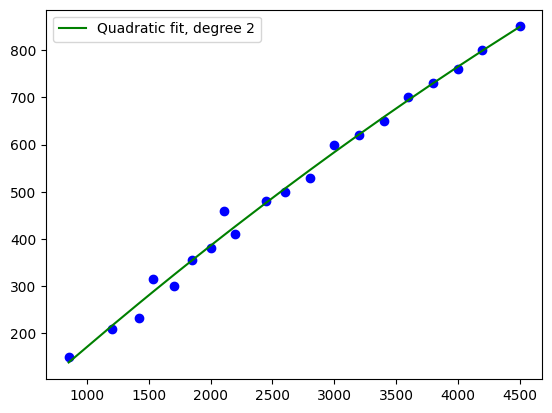

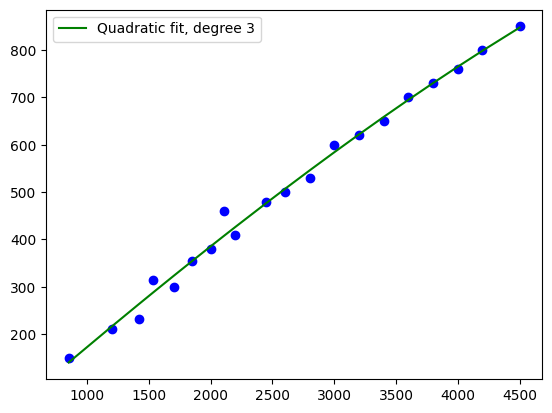

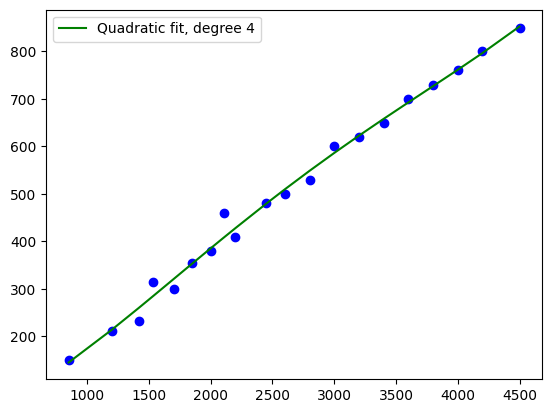

In [30]:
# TODO: Plot polynomial fits for different degrees
X_range = np.linspace(
    min(X.values.flatten()),
    max(X.values.flatten()),
    200
).reshape(-1,1)

for d,p in predictions.items():
    plt.scatter(X, y, color='blue')
    plt.plot(X, p, color='green', label=f'Quadratic fit, degree {d}')
    plt.legend()
    plt.show()

## Step 4. Train/Test Split (TODO)

Train errors: {1: 488.70890657577837, 2: 397.5765155549094, 3: 363.878748983051, 4: 342.2987251923256}
Test errors: {1: 57.45492252845213, 2: 51.90121062598926, 3: 33.714771310448356, 4: 31.88186763238642}


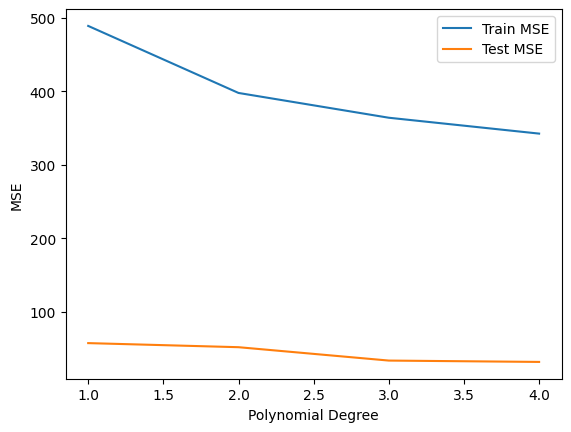

In [32]:
# Generate teh 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_err, test_err = {}, {}

for d in range(1, 5):
    # Loop over polynomials 1–4, fit models of different polynomials, compare train and test MSE
    
    # Hint from Lucy: 
    # > Don't forget... you can use the .fit_transform() method to transform your 
    # > training AND testing data to generate the polynomial features :)
    
    #_, _, train_err[d] = fit_polynomial(X_train, y_train, degree=d)
    #_, _, test_err[d] = fit_polynomial(X_test, y_test, degree=d)

    poly = PolynomialFeatures(degree=d, include_bias=False)


print('Train errors:', train_err) 
print('Test errors:', test_err)

plt.plot(train_err.keys(), train_err.values(), label='Train MSE')
plt.plot(test_err.keys(), test_err.values(), label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend(); plt.show()